<a href="https://colab.research.google.com/github/shreya0202/Perceptron/blob/main/ElectricalGridStabilityData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import csv
from statistics import mean
import pandas as pd
from numpy import random
from random import *
from matplotlib import pyplot as plt
import math
from math import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
# Perceptron class
class SL_Perceptron(object):
    
    def __init__(self, num_samples):
        # Initialises the weights with all zeros and sets the learning rate
        self.w = np.zeros(num_samples)
        self.lr = 0.01
        
    def update_weights(self, sample, error):
        # In case of a misclassification, update the weight vector
        for i in range(len(sample)):
            self.w[i] += (self.lr * sample[i] * error)

    def output_sigmoid(self, samples):
        # Calculates the sum of products of weights(W) and samples(X) 
        # and returns the sigmoid of that value
        value = 0
        
        for i in range(len(samples)):
            value += samples[i]*self.w[i]
             
        return float(1/(1+exp(-value)))
    
    def result(self, sample):
        res = self.output_sigmoid(sample)
        if(res > 0.5):
            return 1
        elif(res <= 0.5):
            return 0
        else:
            return -1

In [ ]:
# Normalize the data between 0 and 1 by using min-max normalization
def normalize_data(x_list):
    x_transpose = np.transpose(x_list)
    
    for i in range(len(x_transpose)):
        min_val = min(x_transpose[i])
        max_val = max(x_transpose[i])
        dev = max_val - min_val
        for j in range(len(x_transpose[i])):
            x_transpose[i][j] = (x_transpose[i][j] - min_val)/dev
            x_transpose[i][j] = np.round(x_transpose[i][j], 2)
    
    norm_list = np.transpose(x_transpose)
    
    return norm_list

In [ ]:
def model_training(input_train, output_train, pptron, epochs):

    training_results = []
    num_epochs = epochs
    
    print("\n\n----------Training----------")
    total_train_samples = len(input_train)
    print("\nNumber of testing data points: {}\n".format(total_train_samples))
    
    # Set limit to number of epochs = 30 in while loop
    epochs = 0
    
    while(epochs < num_epochs):

        x_data = []
        i = 0
        # Iterate over each record in training-data
        for sample in input_train:
                     
            flag = 0
            
            # Calculate output using sigmoid of each iteration
            output = pptron.output_sigmoid(sample[0])
            
            # Calculate error signal
            # Not to be calculated in case of testing
            error = sample[1] - output
            
            # Check for result accuracy
            flag = pptron.result(sample[0])
            x_data = np.append(x_data, flag)

            # Update weights according to error signal
            # Not to be done in case of testing since we need pre-trained weight vectors
            pptron.update_weights(sample[0], error)

        accuracy = (accuracy_score(y_true=output_train, y_pred=x_data)) * 100     
        training_results.append(accuracy)   

        epochs += 1

        if(epochs%5 == 0):
            print("Epoch {}: Training Accuracy metric: {}%".format(epochs, round(accuracy, 2)))

    return training_results

In [ ]:
def model_testing(input_test, output_test, pptron):
    
    print("\n\n----------Training----------")
    total_test_samples = len(input_test)
    print("\nNumber of testing data points: {}".format(total_test_samples))
    epochs = 0
    
    while(epochs < 1):

        x_data = []
        i = 0
        # Iterate over each record in training-data
        for sample in input_test:
                     
            flag = 0
            # Calculate output using sigmoid of each iteration
            output = pptron.output_sigmoid(sample[0])

            # Check for result accuracy
            flag = pptron.result(sample[0])
            x_data = np.append(x_data, flag)

        accuracy = (accuracy_score(y_true=output_test, y_pred=x_data)) * 100
        print("Epoch {}: Testing Accuracy metric: {}%".format(epochs, round(accuracy, 2)))
                    
        epochs += 1

In [ ]:
def visualize(acc):
  import matplotlib.pyplot as plt
  x_s = range(500)
  y_s = acc

  plt.plot(x_s, y_s, '-b', label='Train Accuracy')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
def main():
  # Loading dataset and splitting into values and target
  csvData = pd.read_csv('/content/drive/My Drive/Data_for_UCI_named.csv')
  df = pd.DataFrame(csvData)
  # label_encoder object knows how to understand word labels. 
  label_encoder = preprocessing.LabelEncoder() 
    
  # Encode labels in column 'species'. 
  df['stabf']= label_encoder.fit_transform(df['stabf']) 
    
  df['stabf'].unique() 

  # Storing target values in a list
  target = []
  target.append(df['stabf'].values)

  # Storing all data other than target column in a variable
  cols = df.iloc[:, :-1]
  df_values = pd.DataFrame(cols)

  # Removing feature names and storing in a list
  df_values.columns = [''] * len(df_values.columns)
  values = []
  values = df_values.values
  np.shape(target)
  target = target[0]
 
  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(values, target, test_size=0.3, random_state= 2000)

  # Create a tuple of the training data-set to be used for weight updation
  # and error signal calculation
  training_data = list(zip(X_train, y_train))
  testing_data = list(zip(X_test, y_test))

  # Create SL_Perceptron object
  perceptron = SL_Perceptron(len(values[0]))

  train_accs = model_training(training_data, y_train, perceptron, 500)

  model_testing(testing_data, y_test, perceptron)
  print()
  visualize(train_accs)



----------Training----------

Number of testing data points: 7000

Epoch 5: Training Accuracy metric: 70.4%
Epoch 10: Training Accuracy metric: 72.09%
Epoch 15: Training Accuracy metric: 73.74%
Epoch 20: Training Accuracy metric: 75.73%
Epoch 25: Training Accuracy metric: 77.19%
Epoch 30: Training Accuracy metric: 78.6%
Epoch 35: Training Accuracy metric: 79.74%
Epoch 40: Training Accuracy metric: 81.01%
Epoch 45: Training Accuracy metric: 82.3%
Epoch 50: Training Accuracy metric: 83.2%
Epoch 55: Training Accuracy metric: 84.16%
Epoch 60: Training Accuracy metric: 84.97%
Epoch 65: Training Accuracy metric: 85.83%
Epoch 70: Training Accuracy metric: 86.63%
Epoch 75: Training Accuracy metric: 87.2%
Epoch 80: Training Accuracy metric: 87.69%
Epoch 85: Training Accuracy metric: 88.19%
Epoch 90: Training Accuracy metric: 88.71%
Epoch 95: Training Accuracy metric: 89.1%
Epoch 100: Training Accuracy metric: 89.46%
Epoch 105: Training Accuracy metric: 89.76%
Epoch 110: Training Accuracy metr

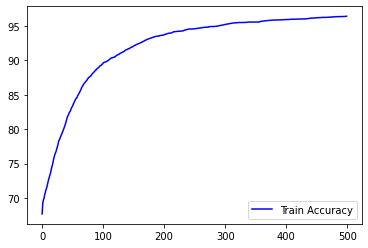

In [ ]:
main()